<a href="https://colab.research.google.com/github/crisalex25/TFM/blob/main/TFM_An%C3%A1lisis_exploratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo de Fin de Master**
## **Máster Universitario en Inteligencia Artificial para el Sector de la Energía y las Infraestructuras**
Optimización de generación en centrales hidroeléctricas mediante técnicas de aprendizaje automático

## Análisis exploratorio de datos


###Librerias

In [43]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import YearLocator, DateFormatter

###Leer Dataset

In [44]:
AC="https://raw.githubusercontent.com/crisalex25/TFM/main/AC3.csv"
GC="https://raw.githubusercontent.com/crisalex25/TFM/main/GC3.csv"
PD="https://raw.githubusercontent.com/crisalex25/TFM/main/PrecD3.csv"


In [45]:
dfAC = pd.read_csv(AC, sep=';', decimal=",", parse_dates=['Fecha_Hora'])
dfGC = pd.read_csv(GC, sep=';', decimal=",", parse_dates=['Fecha_Hora'])
dfPD = pd.read_csv(PD, sep=';', decimal=",", parse_dates=['Fecha_Hora'])

fecha_limite = datetime(2023, 1, 1, 0, 0)  # Fecha límite

dfAC = dfAC[dfAC['Fecha_Hora'] <= fecha_limite]
dfGC = dfGC[dfGC['Fecha_Hora'] <= fecha_limite]
dfPD = dfPD[dfPD['Fecha_Hora'] <= fecha_limite]

###Graficas

In [46]:
df1=dfAC
df2=dfGC
df3=dfPD

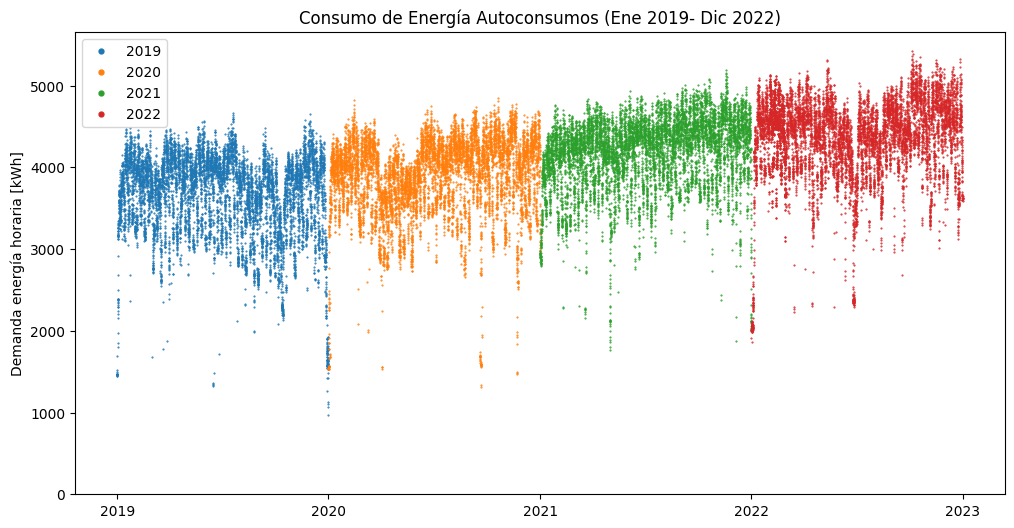

In [47]:
# Crear un DataFrame de ejemplo
df1 = pd.DataFrame(df1)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df1['Fecha_Hora'] = pd.to_datetime(df1['Fecha_Hora'], format='%Y/%m/%d %H:%M')

# Crear una figura y subtramas
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# Iterar sobre los años
for year in range(df1['Fecha_Hora'].min().year, df1['Fecha_Hora'].max().year):
    # Filtrar los datos para el año actual
    df_year = df1[df1['Fecha_Hora'].dt.year == year]

    # Crear la gráfica de línea de tiempo para el año actual
    line, = axs.plot(df_year['Fecha_Hora'], df_year['valor'], marker='o', linestyle='', markersize=0.5, label=str(year))

# Personalizar la gráfica
axs.set_ylim(bottom=0)
axs.set_ylabel('Demanda energía horaria [kWh]')
axs.set_title('Consumo de Energía Autoconsumos (Ene 2019- Dic 2022)')

# Configurar los ejes x con años
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

# Añadir una leyenda con un tamaño de fuente más grande para el color
handles, labels = axs.get_legend_handles_labels()
if len(handles) > 1 and len(handles[-1].get_xdata()) < 2:
    handles = handles[:-1]
    labels = labels[:-1]
legend = axs.legend(handles, labels, markerscale=7)


# Mostrar la gráfica
plt.show()


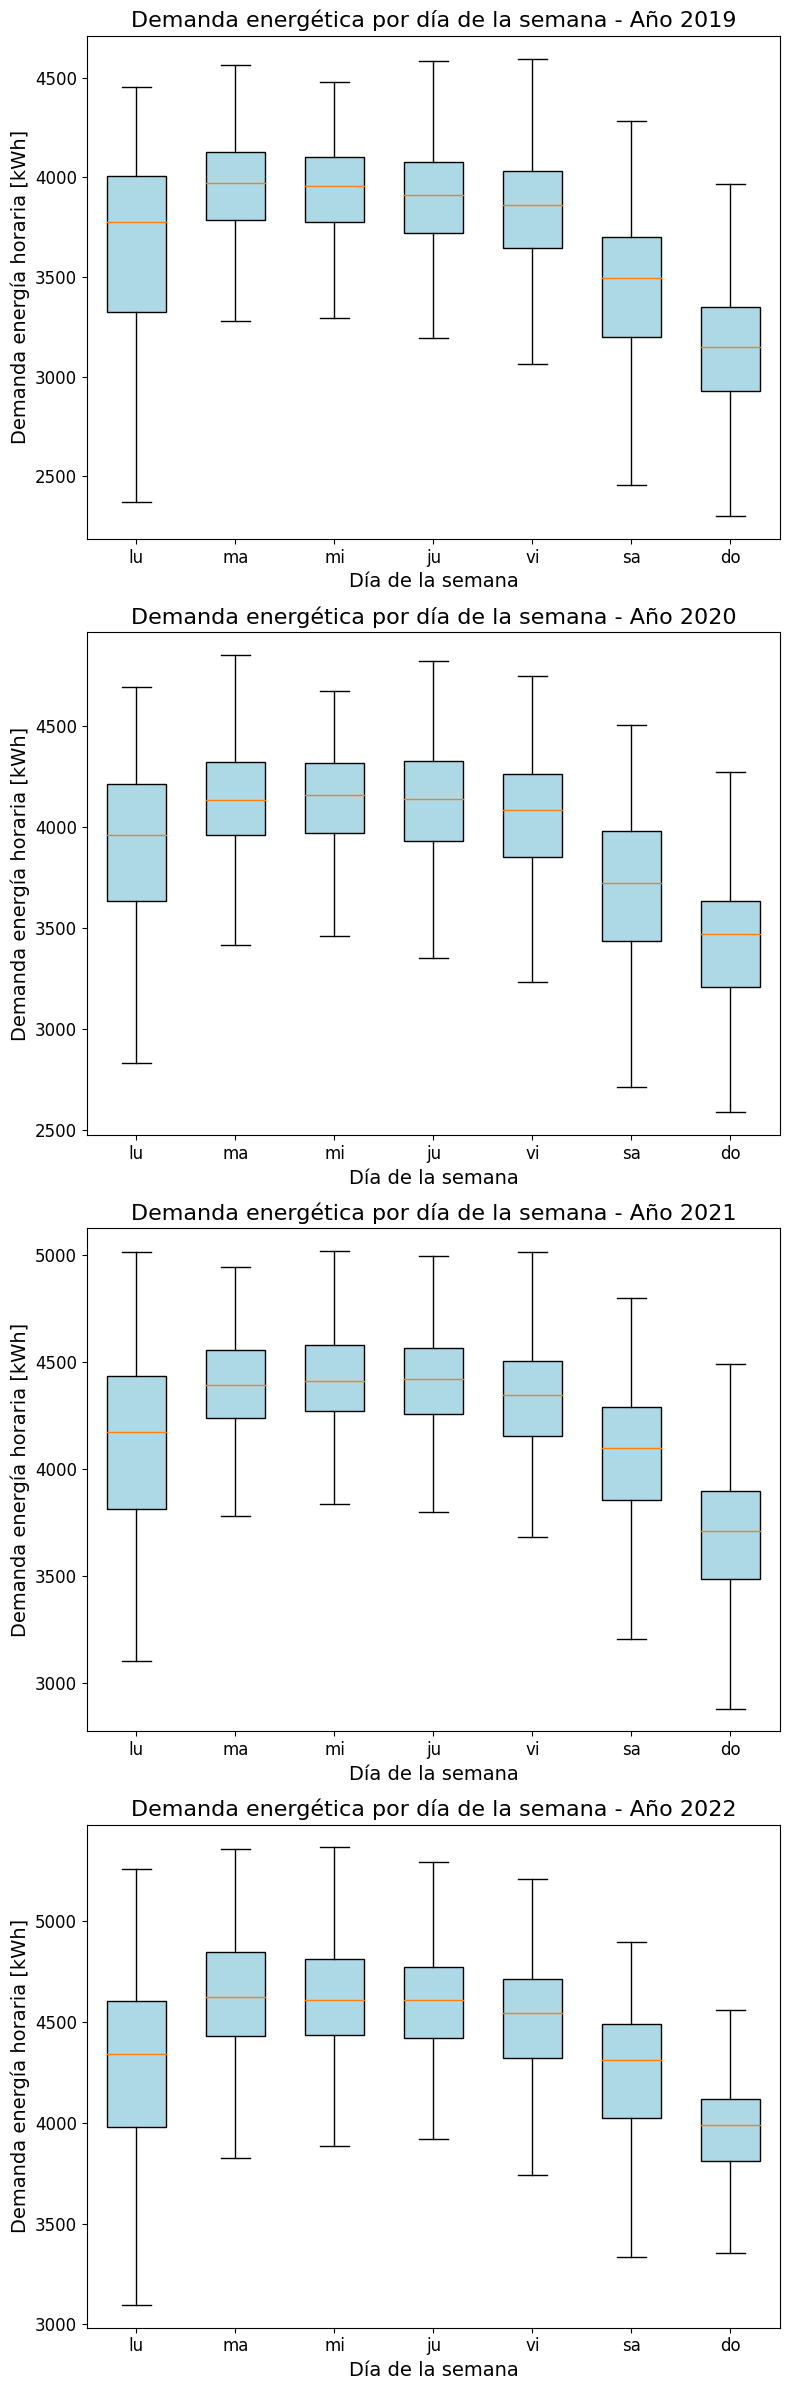

In [48]:
# Crear un DataFrame de ejemplo
dfAC = pd.DataFrame(dfAC)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
dfAC['Fecha_Hora'] = pd.to_datetime(dfAC['Fecha_Hora'], format='%Y/%m/%d %H:%M')

# Filtrar los datos para incluir solo los años del 2019 al 2022
dfAC = dfAC[dfAC['Fecha_Hora'].dt.year.between(2019, 2022)]

# Obtener los años presentes en el DataFrame
years = dfAC['Fecha_Hora'].dt.year.unique()

# Crear una figura y subtramas
fig, axs = plt.subplots(nrows=len(years), ncols=1, figsize=(8, 6 * len(years)))

# Iterar sobre los años
for i, year in enumerate(years):
    # Filtrar los datos para el año actual
    df_year = dfAC[dfAC['Fecha_Hora'].dt.year == year]

    # Crear una lista para almacenar los datos por día de la semana
    data_by_day = []

    # Iterar sobre los días de la semana (Lunes a Domingo)
    for day in range(7):
        # Filtrar los datos para el día de la semana actual
        df_day = df_year[df_year['Fecha_Hora'].dt.dayofweek == day]

        # Obtener la demanda energética para el día de la semana actual
        data_by_day.append(df_day['valor'].values)

    # Crear la gráfica de cajas y bigotes para el año actual
    axs[i].boxplot(data_by_day, positions=[0, 1, 2, 3, 4, 5, 6], showfliers=False, labels=['lu', 'ma', 'mi', 'ju', 'vi', 'sa', 'do'], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))

    # Personalizar la gráfica para el año actual
    axs[i].set_ylabel('Demanda energía horaria [kWh]', fontsize=14)
    axs[i].set_xlabel('Día de la semana', fontsize=14)
    axs[i].set_title(f'Demanda energética por día de la semana - Año {year}', fontsize=16)

    # Ajustar automáticamente el eje y
    axs[i].autoscale(enable=True, axis='y')

    # Aumentar el tamaño de los textos y los valores
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].tick_params(axis='both', which='minor', labelsize=10)

# Ajustar el espaciado entre subtramas
fig.tight_layout()

# Mostrar las gráficas
plt.show()




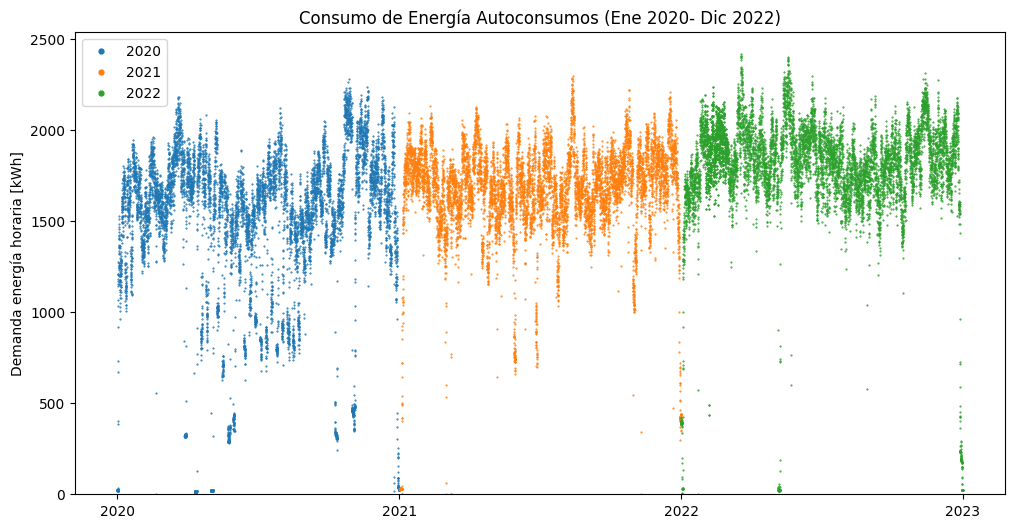

In [49]:
# Crear un DataFrame de ejemplo
df2 = pd.DataFrame(df2)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df2['Fecha_Hora'] = pd.to_datetime(df2['Fecha_Hora'], format='%Y/%m/%d %H:%M')

# Crear una figura y subtramas
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# Iterar sobre los años
for year in range(df2['Fecha_Hora'].min().year, df2['Fecha_Hora'].max().year):
    # Filtrar los datos para el año actual
    df_year = df2[df2['Fecha_Hora'].dt.year == year]

    # Crear la gráfica de línea de tiempo para el año actual
    line, = axs.plot(df_year['Fecha_Hora'], df_year['valor'], marker='o', linestyle='', markersize=0.5, label=str(year))

# Personalizar la gráfica
axs.set_ylim(bottom=0)
axs.set_ylabel('Demanda energía horaria [kWh]')
axs.set_title('Consumo de Energía Autoconsumos (Ene 2020- Dic 2022)')

# Configurar los ejes x con años
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

# Añadir una leyenda con un tamaño de fuente más grande para el color
handles, labels = axs.get_legend_handles_labels()
if len(handles) > 1 and len(handles[-1].get_xdata()) < 2:
    handles = handles[:-1]
    labels = labels[:-1]
legend = axs.legend(handles, labels, markerscale=7)


# Mostrar la gráfica
plt.show()

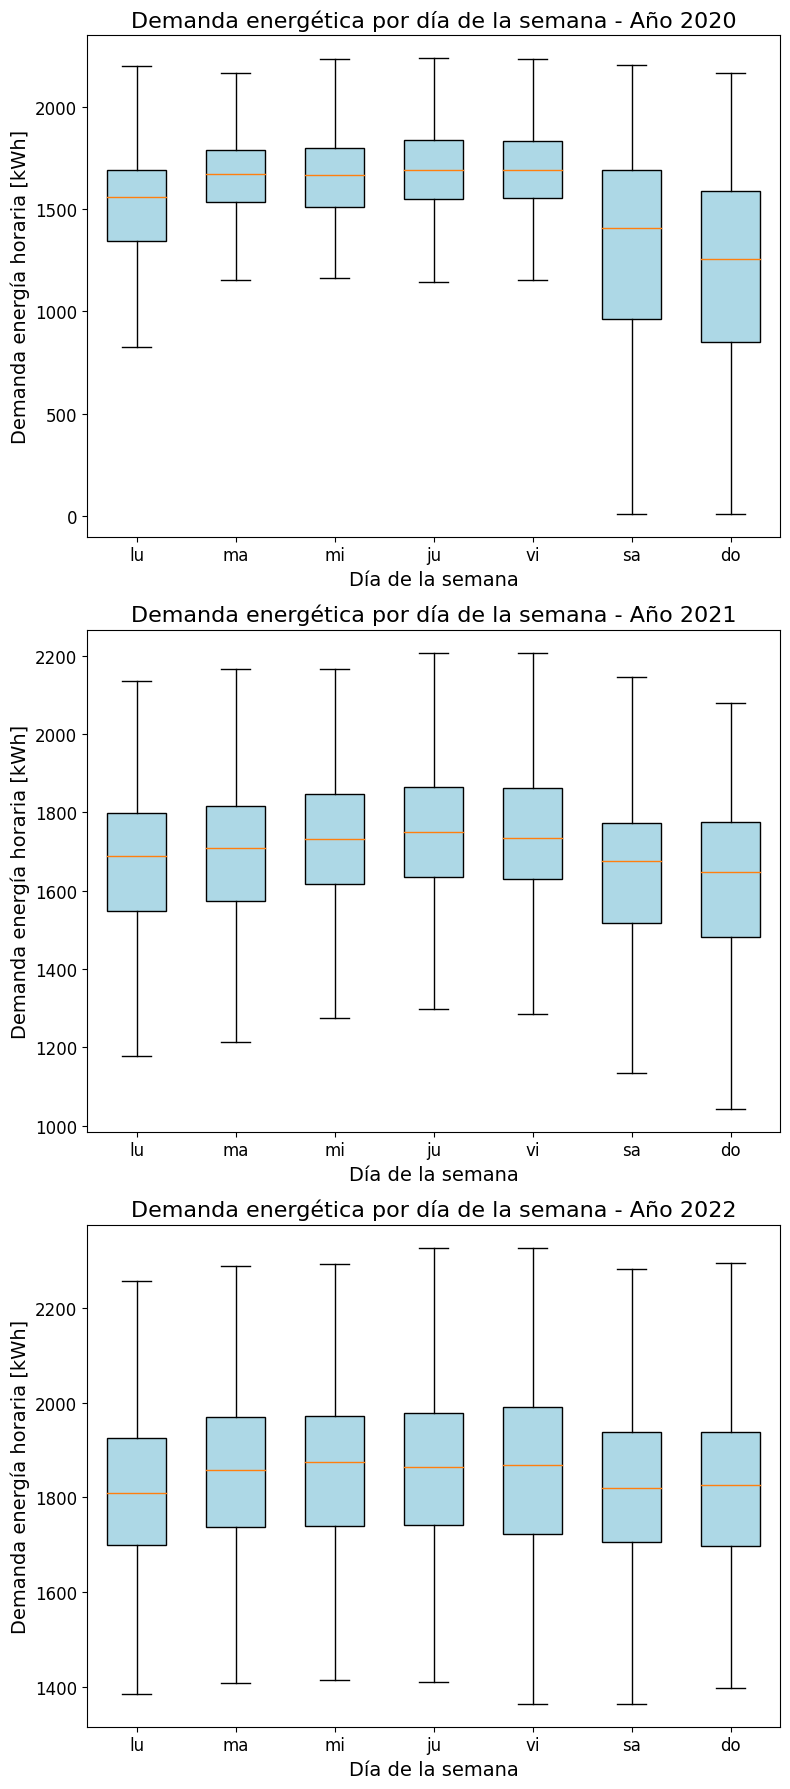

In [50]:
# Crear un DataFrame de ejemplo
dfGC = pd.DataFrame(dfGC)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
dfGC['Fecha_Hora'] = pd.to_datetime(dfGC['Fecha_Hora'], format='%Y/%m/%d %H:%M')

# Filtrar los datos para incluir solo los años del 2019 al 2022
dfGC = dfGC[dfGC['Fecha_Hora'].dt.year.between(2019, 2022)]

# Obtener los años presentes en el DataFrame
years = dfGC['Fecha_Hora'].dt.year.unique()

# Crear una figura y subtramas
fig, axs = plt.subplots(nrows=len(years), ncols=1, figsize=(8, 6 * len(years)))

# Iterar sobre los años
for i, year in enumerate(years):
    # Filtrar los datos para el año actual
    df_year = dfGC[dfGC['Fecha_Hora'].dt.year == year]

    # Crear una lista para almacenar los datos por día de la semana
    data_by_day = []

    # Iterar sobre los días de la semana (Lunes a Domingo)
    for day in range(7):
        # Filtrar los datos para el día de la semana actual
        df_day = df_year[df_year['Fecha_Hora'].dt.dayofweek == day]

        # Obtener la demanda energética para el día de la semana actual
        data_by_day.append(df_day['valor'].values)

    # Crear la gráfica de cajas y bigotes para el año actual
    axs[i].boxplot(data_by_day, positions=[0, 1, 2, 3, 4, 5, 6], showfliers=False, labels=['lu', 'ma', 'mi', 'ju', 'vi', 'sa', 'do'], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))

    # Personalizar la gráfica para el año actual
    axs[i].set_ylabel('Demanda energía horaria [kWh]', fontsize=14)
    axs[i].set_xlabel('Día de la semana', fontsize=14)
    axs[i].set_title(f'Demanda energética por día de la semana - Año {year}', fontsize=16)

    # Ajustar automáticamente el eje y
    axs[i].autoscale(enable=True, axis='y')

    # Aumentar el tamaño de los textos y los valores
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].tick_params(axis='both', which='minor', labelsize=10)

# Ajustar el espaciado entre subtramas
fig.tight_layout()

# Mostrar las gráficas
plt.show()


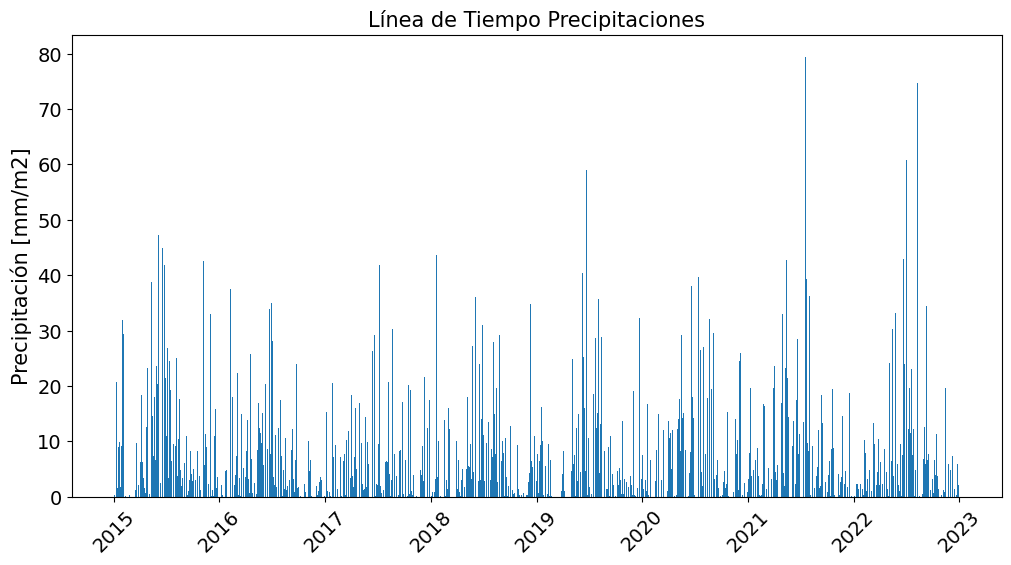

In [51]:
# Crear un DataFrame de ejemplo
df = pd.DataFrame(df3)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Hora'], format='%Y/%m/%d')

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico
plt.bar(df['Fecha_Hora'], df['valor'])

# Personalizar la gráfica
plt.ylim(bottom=0)
plt.ylabel('Precipitación [mm/m2]', fontsize=15)  # Aumentar el tamaño del texto del eje y
plt.title('Línea de Tiempo Precipitaciones', fontsize=15)  # Aumentar el tamaño del título
plt.xticks(rotation=45, fontsize=14)  # Aumentar el tamaño de los números del eje x
plt.yticks(fontsize=14)  # Aumentar el tamaño de los números del eje y

# Mostrar la gráfica
plt.show()



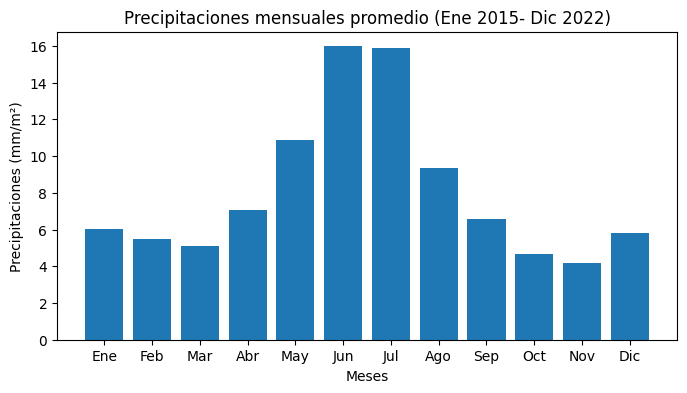

In [52]:
df3 = pd.DataFrame(df3)

# Convertir la columna 'Tiempo' a formato de fecha
df3['Fecha_Hora'] = pd.to_datetime(df3['Fecha_Hora'], format='%Y/%m/%d')

# Agregar una columna de Meses
df3['Meses'] = df3['Fecha_Hora'].dt.month

# Calcular las precipitaciones mensuales
precipitaciones_mensuales = df3.groupby('Meses')['valor'].mean()

# Crear la gráfica de barras
plt.figure(figsize=(8, 4))  # Ajustar el tamaño del gráfico
plt.bar(precipitaciones_mensuales.index, precipitaciones_mensuales)


# Personalizar la gráfica
plt.xlabel('Meses')
plt.ylabel('Precipitaciones (mm/m²)')
plt.title('Precipitaciones mensuales promedio (Ene 2015- Dic 2022)')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar la gráfica
plt.show()

In [53]:
# Crear un DataFrame de ejemplo
df3 = pd.DataFrame(df3)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df3['Fecha_Hora'] = pd.to_datetime(df3['Fecha_Hora'], format='%Y/%m/%d')

# Agregar una columna de Meses
df3['Meses'] = df3['Fecha_Hora'].dt.month

# Calcular las precipitaciones mensuales
tabla_resumen = df3.pivot_table(index='Meses', values='valor', aggfunc='mean')

# Redondear los valores a 2 decimales
tabla_resumen = tabla_resumen.round(2)

# Establecer el nombre de los meses
tabla_resumen['Meses'] = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Ordenar la tabla por Meses
orden_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
tabla_resumen = tabla_resumen.set_index('Meses').loc[orden_meses]

print(tabla_resumen)
tabla_resumen = tabla_resumen.round(2)

# Exportar la tabla de resumen a un archivo CSV
tabla_resumen.to_csv('Promedio de Precipitación Mensual por Mes.csv', sep=';', decimal='.', index_label='Mes')


       valor
Meses       
Ene     6.02
Feb     5.47
Mar     5.11
Abr     7.08
May    10.86
Jun    15.97
Jul    15.89
Ago     9.36
Sep     6.57
Oct     4.69
Nov     4.16
Dic     5.83


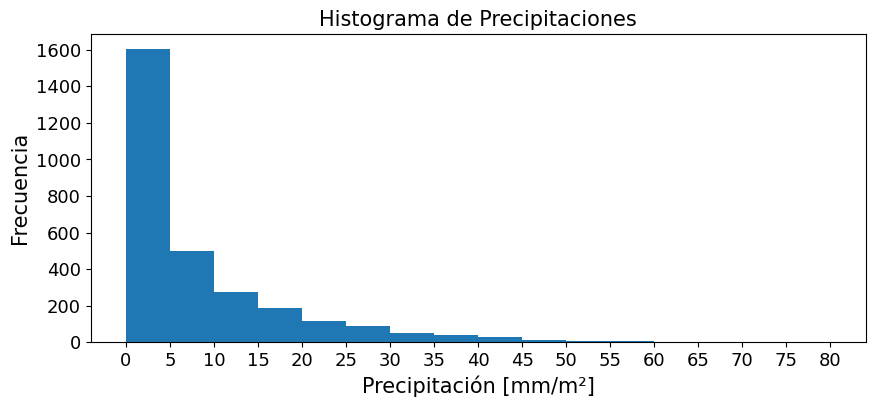

In [54]:
# Crear un DataFrame de ejemplo
df = pd.DataFrame(df3)

# Obtener los valores de las precipitaciones
precipitaciones = df['valor']

# Crear el histograma
plt.figure(figsize=(10, 4))  # Ajustar el tamaño del gráfico
hist, bins, _ = plt.hist(precipitaciones, bins=range(0, 85, 5))  # Utilizar contenedores (bins) en intervalos de 5 desde 0 hasta 80

# Personalizar la gráfica
plt.xlabel('Precipitación [mm/m²]', fontsize=15)  # Aumentar el tamaño del texto del eje x
plt.ylabel('Frecuencia', fontsize=15)  # Aumentar el tamaño del texto del eje y
plt.title('Histograma de Precipitaciones', fontsize=15)  # Aumentar el tamaño del título
plt.xticks(range(0, 85, 5), fontsize=13)  # Establecer los ticks del eje x en intervalos de 5 desde 0 hasta 80
plt.yticks(fontsize=13)  # Aumentar el tamaño de los números del eje y

# Mostrar la gráfica
plt.show()

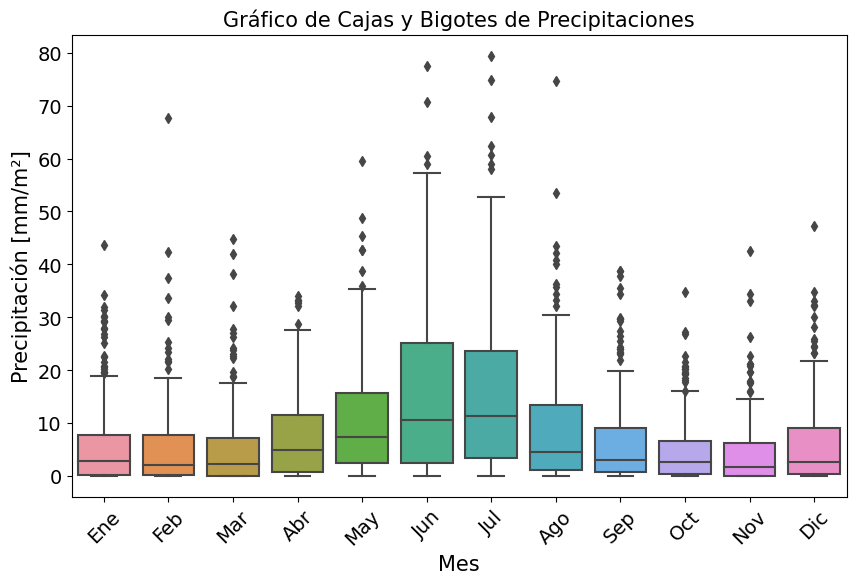

In [55]:
# Crear un DataFrame de ejemplo
df = pd.DataFrame(df3)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Hora'], format='%Y/%m/%d')

# Extraer el mes de la columna 'Fecha_Hora'
df['Mes'] = df['Fecha_Hora'].dt.month

# Mapear los números de mes a los nombres de mes
df['Mes'] = df['Mes'].map({1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'})

# Crear el gráfico de cajas y bigotes
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
sns.boxplot(x='Mes', y='valor', data=df)

# Personalizar la gráfica
plt.xlabel('Mes', fontsize=15)  # Aumentar el tamaño del texto del eje x
plt.ylabel('Precipitación [mm/m²]', fontsize=15)  # Aumentar el tamaño del texto del eje y
plt.title('Gráfico de Cajas y Bigotes de Precipitaciones', fontsize=15)  # Aumentar el tamaño del título
plt.xticks(rotation=45, fontsize=14)  # Rotar y aumentar el tamaño de los nombres de los meses en el eje x
plt.yticks(fontsize=14)  # Aumentar el tamaño de los números del eje y

# Mostrar la gráfica
plt.show()


In [56]:
# Crear un DataFrame de ejemplo
df = pd.DataFrame(df3)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Hora'], format='%Y/%m/%d')

# Extraer el mes de la columna 'Fecha_Hora'
df['Mes'] = df['Fecha_Hora'].dt.month

# Mapear los números de mes a los nombres de mes
df['Mes'] = df['Mes'].map({1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'})

# Calcular estadísticas resumidas por mes
resumen = df.groupby('Mes')['valor'].agg(['mean', 'median', 'std', 'min', 'max'])

# Redondear los valores a 2 decimales
resumen = resumen.round(2)

# Ordenar la tabla de resumen por mes
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
resumen = resumen.reindex(orden_meses)

# Mostrar la tabla de resumen ordenada por mes
print(resumen)

             mean  median    std  min   max
Mes                                        
Enero        6.02    2.80   8.13  0.0  43.7
Febrero      5.47    2.10   8.42  0.0  67.7
Marzo        5.11    2.25   7.38  0.0  44.7
Abril        7.08    4.95   7.78  0.0  34.1
Mayo        10.86    7.45  10.71  0.0  59.6
Junio       15.97   10.65  15.95  0.0  77.5
Julio       15.89   11.25  15.54  0.0  79.4
Agosto       9.36    4.60  11.28  0.0  74.6
Septiembre   6.57    3.00   8.33  0.0  38.8
Octubre      4.69    2.55   6.08  0.0  34.8
Noviembre    4.16    1.70   6.26  0.0  42.5
Diciembre    5.83    2.60   7.85  0.0  47.3


In [57]:
resumen = resumen.round(2)

# Exportar la tabla de resumen a un archivo CSV
resumen.to_csv('tabla_resumen.csv', sep=';', decimal='.', index_label='Mes')